In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import cv2


In [2]:
%matplotlib inline

In [3]:
img = cv2.imread('C:/Users/prant/Documents/Jupyter Notebook/Image Classifier/model/test_images/lm10.jpg')
img.shape

(2048, 2048, 3)

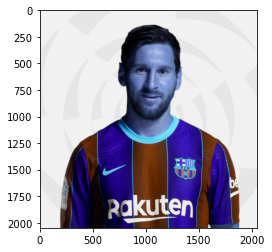

In [4]:
plt.imshow(img)

# GRAY IMAGE TRANSFORMATION AND BASIC FACE DETECTION

******************************CONCEPT IN VIDEO 3 *********************************************************************

In [5]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)   # COLOURED TO GRAY IMAGE
gray_img.shape

(2048, 2048)

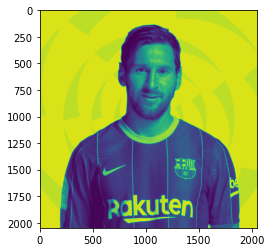

In [6]:
plt.imshow(gray_img)

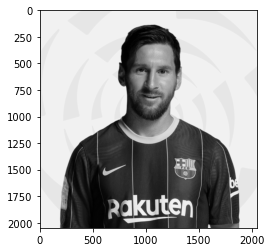

In [7]:
plt.imshow(gray_img, cmap='gray')

In [8]:
gray_img

array([[241, 241, 241, ..., 241, 241, 241],
       [241, 241, 241, ..., 241, 241, 241],
       [241, 241, 241, ..., 241, 241, 241],
       ...,
       [241, 241, 241, ..., 241, 241, 241],
       [241, 241, 241, ..., 241, 241, 241],
       [241, 241, 241, ..., 241, 241, 241]], dtype=uint8)

In [9]:
face_cascade = cv2.CascadeClassifier('C:/Users/prant/Documents/Jupyter Notebook/Image Classifier/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/prant/Documents/Jupyter Notebook/Image Classifier/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)

faces

array([[ 760,  338,  591,  591],
       [1594, 1491,   89,   89]], dtype=int32)

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(760, 338, 591, 591)

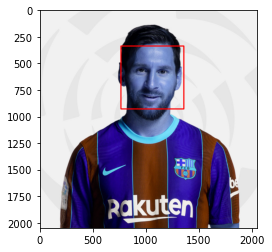

In [11]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (455,0,0), 10)    # (x,y), (x+w,y+h) means face is between 2 points (x,y) & (x+w,y+h)
                                                                  # (0,455,0) is rgb color
                                                                  # 10 means thickness of the rectangle sides are 10
plt.imshow(face_img)

In [12]:
for (x,y,w,h) in faces:                                             # code copied from opencv tutorials
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,455),5)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,455,0),5)

img = cv2.resize(img,(400,400))        # resizing image because the image dimension is too big
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

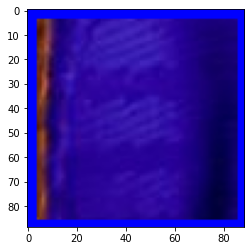

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

# IMAGE FACE CROPPING

******************************CONCEPT IN VIDEO 3 *********************************************************************

In [14]:
def croppedImageofFace_if_2_eyes(image_path):
    img = cv2.imread(image_path)                    # initially this line was plt.imread, but it was giving error later in code. So, I changed it to cv2.imread
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    cropp_faces = []
    
    for (x,y,w,h) in faces:                                             
        roi_gray = gray_img[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if not len(eyes) <2:
#             return roi_color
              cropp_faces.append(roi_color)
   
        
    return cropp_faces

In [15]:
cropped_img_lm10 = croppedImageofFace_if_2_eyes('C:/Users/prant/Documents/Jupyter Notebook/Image Classifier/model/test_images/lm10.jpg')

cropped_img_lm10

[array([[[232, 232, 232],
         [229, 229, 229],
         [230, 230, 230],
         ...,
         [230, 230, 230],
         [230, 230, 230],
         [230, 230, 230]],
 
        [[231, 231, 231],
         [229, 229, 229],
         [230, 230, 230],
         ...,
         [230, 230, 230],
         [230, 230, 230],
         [230, 230, 230]],
 
        [[230, 230, 230],
         [229, 229, 229],
         [229, 229, 229],
         ...,
         [230, 230, 230],
         [230, 230, 230],
         [230, 230, 230]],
 
        ...,
 
        [[241, 241, 241],
         [241, 241, 241],
         [241, 241, 241],
         ...,
         [241, 241, 241],
         [241, 241, 241],
         [241, 241, 241]],
 
        [[241, 241, 241],
         [241, 241, 241],
         [241, 241, 241],
         ...,
         [241, 241, 241],
         [241, 241, 241],
         [241, 241, 241]],
 
        [[241, 241, 241],
         [241, 241, 241],
         [241, 241, 241],
         ...,
         [241, 241, 241],
  

In [18]:
len(cropped_img_lm10)

1

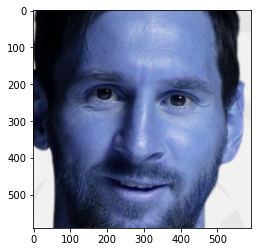

In [20]:
for i in range(len(cropped_img_lm10)):
    plt.imshow(cropped_img_lm10[i])

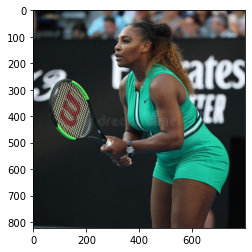

In [21]:
img_sw_path = 'C:/Users/prant/Documents/Jupyter Notebook/Image Classifier/model/test_images/sw.jpg'
original_img_sw = plt.imread(img_sw_path)
plt.imshow(original_img_sw)

In [22]:
# croppped_img_sw = croppedImageofFace_if_2_eyes(img_sw_path) 
# plt.imshow(croppped_img_sw[0])

# this will not give cropped image of the face because 2 eyes are clearly visible. It is giving errorr instead..so, I have commented out this.

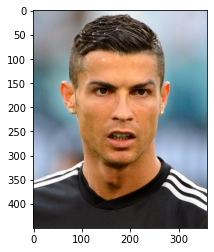

In [23]:
img_cr7_path = 'C:/Users/prant/Documents/Jupyter Notebook/Image Classifier/model/test_images/cr7.jpg'
original_img_cr7 = plt.imread(img_cr7_path)
plt.imshow(original_img_cr7)

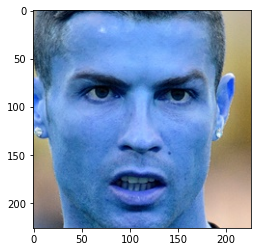

In [25]:
cropped_img_cr7 = croppedImageofFace_if_2_eyes(img_cr7_path) 
for i in range(len(cropped_img_cr7)):
    plt.imshow(cropped_img_cr7[i])

In [26]:
path_to_data = "./datasets"
path_to_croppedImages = "./cropped"

In [27]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):      # this code saves the paths of all(old & new) directries in datasets folder into img_dir
    if entry.is_dir():
        img_dirs.append(entry.path)

In [28]:
img_dirs

['./datasets\\cristiano_ronaldo',
 './datasets\\lionel_messi',
 './datasets\\serena_williams',
 './datasets\\tom_cruise',
 './datasets\\virat_kohli']

In [29]:
c = 1
for img_dir in img_dirs:
    for entry in os.scandir(img_dir):
        print(entry.path)
        c  = c+1;
        if(c>5):
            break
                    # I was just making sure if I can print the path of images in img_dir

./datasets\cristiano_ronaldo\0_GettyImages-78221520.jpg
./datasets\cristiano_ronaldo\103946389-GettyImages-531359844.jpg
./datasets\cristiano_ronaldo\1201.jpg
./datasets\cristiano_ronaldo\13029.jpg
./datasets\cristiano_ronaldo\1602787561-CristianoRonaldo.jpg
./datasets\lionel_messi\04messi-mediumSquareAt3X.jpg
./datasets\serena_williams\01-1992-serena-williams-1548367jpg.jpg
./datasets\tom_cruise\103149764.jpg
./datasets\virat_kohli\160506102908-talk-asia-virat-kohli-spc-b-00021621-full-169.jpg


*********SAVING CROPPED FACES IN Cropped FOLDER**********************************

In [30]:
cropped_img_dirs = []
celebs_file_name_dict = {}

for img_dir in img_dirs:
    celebrity_name = img_dir.split('\\')[-1]   # this line means it will split the name of image directries of img_dirs in 2 parts where '//' symbol is present in the name. And it will return last part among those 2 parts(since -1 index means last index)
    print(celebrity_name)
    count = 1
    
    celebs_file_name_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        crop = croppedImageofFace_if_2_eyes(entry.path)
        if not len(crop)==0:
            croppedFolder = path_to_croppedImages +"/" +  celebrity_name
            if not os.path.exists(croppedFolder):
                os.mkdir(croppedFolder)
                print("Gererating cropped folder ", croppedFolder)
                cropped_img_dirs.append(croppedFolder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
 
                #cropped_file_name = str(entry.path).split('\\')[-1]
            cropped_file_path = croppedFolder + "/" + cropped_file_name
            
            for i in range(len(crop)):
                cv2.imwrite(cropped_file_path,crop[i])
            celebs_file_name_dict[celebrity_name].append(cropped_file_path)  # Here celebrity name is the key and cropped_file_path for different celebrity names is the value assigned to those keys
                                                                             # In python dict(dictionary) is similar to map in java
            count = count + 1
    print(count-1) 
     
        # DON'T OPEN CROPPED FOLDER WHILE THE CODE IS STILL RUNNING

cristiano_ronaldo
36
lionel_messi
22
serena_williams
21
tom_cruise
38
virat_kohli
32


In [31]:
# i = croppedImageofFace_if_2_eyes('./datasets/virat_kohli/160506102908-talk-asia-virat-kohli-spc-b-00021621-full-169.jpg')
# # cv2.imwrite('C:/Users/prant/Desktop',i)
# cv2.imwrite('C:/Users/prant/Desktop/23.jpg',i)

In [32]:
# plt.imshow(i)

In [33]:
c=1
for entry in os.scandir('.\datasets\lionel_messi'):
        print(entry.path)
        c  = c+1;
        if(c>5):
            break

.\datasets\lionel_messi\04messi-mediumSquareAt3X.jpg
.\datasets\lionel_messi\0_Lionel-Messi.jpg
.\datasets\lionel_messi\1608611033_lionel-messi.jpg
.\datasets\lionel_messi\2017_FRIENDLY_MATCH_RUSSIA_v_ARGENTINA_-_Leo_Messi.jpg
.\datasets\lionel_messi\54707512_401.jpg


In [34]:
c=1
for img_dir in img_dirs:
    for entry in os.scandir(img_dir):
        print(str(entry.path).split("\\")[-1])
        if(c>4):
            break
        c=c+1             # THIS IS JUST I WAS SEEING HOW CAN I ONLY GET THE NAME OF IMAGES

0_GettyImages-78221520.jpg
103946389-GettyImages-531359844.jpg
1201.jpg
13029.jpg
1602787561-CristianoRonaldo.jpg
04messi-mediumSquareAt3X.jpg
01-1992-serena-williams-1548367jpg.jpg
103149764.jpg
160506102908-talk-asia-virat-kohli-spc-b-00021621-full-169.jpg


# WAVELENGTH TRANSFORMATION (FEATURE ENGINEERING)

******************************CONCEPT IN VIDEO 4 *********************************************************************

**###################  WAVELENGTH TRANSFORMATION #############################3

In [35]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

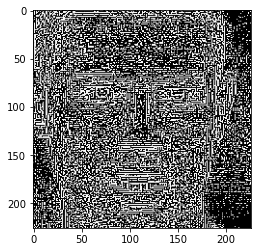

In [38]:
for i in range(len(cropped_img_cr7)):
    plt.imshow( w2d(croppped_img_cr7[i]), cmap='gray')  # wavelength transform for previously cropped cr7 image

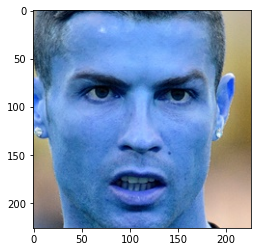

In [39]:
for i in range(len(cropped_img_cr7)):
    plt.imshow(croppped_img_cr7[i], cmap='gray')   # This was the original cropped cr7 image before wavelength transformation

In [40]:
celebs_file_name_dict

{'cristiano_ronaldo': ['./cropped/cristiano_ronaldo/cristiano_ronaldo1.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo2.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo3.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo4.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo5.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo6.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo7.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo8.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo9.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo10.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo11.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo12.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo13.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo14.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo15.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo16.jpg',
  './cropped/cristiano_ronaldo/cristiano_ronaldo17.jpg',
  './cropped/cristi

In [41]:
class_dict = {}
count = 0

for celeb_name in celebs_file_name_dict.keys():
    class_dict[celeb_name] = count              # Here we are assigning unique number for different celebrities...Now we will use those numbers instead of celebrity names in training the model 
    count = count + 1
    
class_dict

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'serena_williams': 2,
 'tom_cruise': 3,
 'virat_kohli': 4}

In [42]:
x = []
y = []

for celeb_name, training_files in celebs_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        
        if img is None:
            continue
            
        scaled_original_img = cv2.resize(img,(30,30))
        img_har = w2d(img, 'db1', 5)                    # Wavelength transformed images
        scaled_img_har = cv2.resize(img_har,(30,30))

        combined_img = np.vstack((scaled_original_img.reshape(30*30*3,1),scaled_img_har.reshape(30*30,1)))
        x.append(combined_img)
        y.append(class_dict[celeb_name])
        

In [43]:
len(x)

149

In [44]:
len(y)

149

In [45]:
x[0]

array([[ 14],
       [ 15],
       [ 13],
       ...,
       [251],
       [246],
       [251]], dtype=uint8)

In [46]:
len(x[0])   # len(x[0]) = 30*30*3*1 + 30*30*1  as the size of the combined image decided

3600

In [47]:
x = np.array(x).reshape(len(x),3600).astype(float)  # again converting old x python list into numpy array as float numbers
x

array([[ 14.,  15.,  13., ..., 251., 246., 251.],
       [ 84.,  73.,  60., ...,  77., 234.,  19.],
       [ 27.,  36.,  43., ..., 243., 239., 211.],
       ...,
       [ 73.,  58., 120., ..., 226.,   7.,   8.],
       [252., 212., 172., ...,  30.,   4., 249.],
       [ 34.,  31.,  27., ...,   0.,  51.,   0.]])

# DATA CLEANING AND MODEL TRAINIG

******************************CONCEPT IN VIDEO 5 *********************************************************************

**1) SVM Model with rbf kernel turned with heuristic finetuning

In [48]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])  # Here pipe is the model
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.9333333333333333

In [50]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3

    accuracy                           0.93        15
   macro avg       0.96      0.93      0.94        15
weighted avg       0.95      0.93      0.93        15



**Using GridSearch we will find the best model 

In [51]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [52]:
model_params = {   
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [53]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.752991,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.649858,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.798860,{'logisticregression__C': 5}


** Here we can see logistic_regression and svm are giving us better accuracy, now let's test accuracy for x_test and y_test

In [54]:
best_estimators['logistic_regression'].score(x_test,y_test) # logictic_regression is giving best score.....so will use svm as our mode

0.9333333333333333

In [55]:
best_estimators['random_forest'].score(x_test,y_test)

0.6

In [56]:
best_estimators['svm'].score(x_test,y_test)  

0.8666666666666667

In [57]:
best_clf2 = best_estimators['svm']

In [58]:
best_clf = best_estimators['logistic_regression']

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[3, 0, 0, 1, 0],
       [0, 3, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 3]], dtype=int64)

Text(69.0, 0.5, 'Truth')

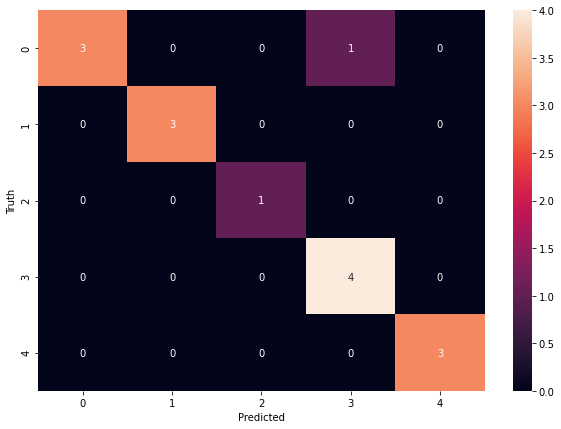

In [60]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Saving the best model

In [61]:
 import joblib

In [62]:
  joblib.dump(best_clf2,'new_saved_model_joblib_svm.pkl')

['new_saved_model_joblib_svm.pkl']

In [63]:
 joblib.dump(best_clf,'new_saved_model_joblib_logistic.pkl')

['new_saved_model_joblib_logistic.pkl']

# Saving class dictionary

In [64]:
class_dict

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'serena_williams': 2,
 'tom_cruise': 3,
 'virat_kohli': 4}

In [65]:
# import json
# with open("class_dictionary.json","w") as f:
#     f.write(json.dumps(class_dict))

In [66]:
x_test

array([[ 21.,  26.,  24., ...,  18., 243.,  93.],
       [224., 217., 208., ..., 245.,   1.,   9.],
       [ 88.,  81.,  81., ..., 109., 109.,  69.],
       ...,
       [ 18.,  27.,  41., ..., 253., 253., 253.],
       [ 75., 136., 195., ..., 229., 244., 247.],
       [ 95.,   7.,  15., ..., 249., 250., 248.]])

In [67]:
best_clf.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=5, solver='liblinear'))])

In [68]:
best_clf.predict(x_test)

array([1, 3, 3, 1, 0, 3, 3, 4, 2, 0, 3, 1, 0, 4, 4])

In [69]:
best_clf.score(x_test,y_test)

0.9333333333333333

In [70]:
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=5, solver='liblinear'))])

In [71]:
best_clf2

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])